In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def central_x(data,x=90):
    low = np.percentile(data, 0)
    high = np.percentile(data, 100-x)
    return [x for x in data if low <= x <= high]


def plot_distribution(data, step_name):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data, fill=True, color='steelblue')
    plt.title(f"{step_name} Timing Distribution")
    plt.xlabel("Time (microseconds)")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_distribution_x(data, step_name,percentile):
    trimmed = central_x(data,percentile)
    plt.figure(figsize=(8, 5))
    sns.kdeplot(trimmed, fill=True, color='teal')
    plt.title(f"{step_name}  with {percentile} percentile ")
    plt.xlabel("Time (microseconds)")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [11]:
import re
import numpy as np

f1='/Users/chandrasekharmukherjee/aligment_tests/STAR_test/output_v2log_4'
f1_sjdb='/Users/chandrasekharmukherjee/aligment_tests/STAR_test/output_v2log_4_sjdb'

f2='/Users/chandrasekharmukherjee/aligment_tests/STAR_test/output_4_no_sjdb_1'

f2_human='/Users/chandrasekharmukherjee/aligment_tests/STAR_test_human/output_mouse_14_no_sjdb'

seed_list=[]
stitch_list=[]

with open(f2_human) as f:
    for line in f:
        match = re.search(r'seed-search:\s*(\d+)stitching(\d+)', line)
        if match:
            seed = int(match.group(1))
            stitching = int(match.group(2))

            seed_list.append(seed)
            stitch_list.append(stitching)


print(np.mean(seed_list),np.mean(stitch_list),len(stitch_list),np.median(seed_list),np.median(stitch_list),len(seed_list))

for x in range(10,101,10):
    print(x,np.percentile(stitch_list,x))

for x in range(10,101,10):
    print(x,np.percentile(seed_list,x))



10.73216 12.65606 100000 7.0 4.0 100000
10 2.0
20 2.0
30 3.0
40 3.0
50 4.0
60 6.0
70 9.0
80 15.0
90 28.0
100 2480.0
10 2.0
20 4.0
30 5.0
40 6.0
50 7.0
60 9.0
70 11.0
80 14.0
90 20.0
100 822.0


In [ ]:

[[53,2],[24,2]]

In [ ]:
Search-range 53 2494093715 2494093662 Time= 2000 0
Lind= 14 Time= 0
Search-range 24 1795416507 1795416483 Time= 2000 1
Lind= 14 Time= 1000
Search-range 70 1680574943 1680574873 Time= 2000 1
Lind= 14 Time= 0
Search-range 2 899933230 899933228 Time= 0 1
Lind= 13 Time= 0
Search-range 14 692586310 692586296 Time= 0 14
Lind= 14 Time= 0
Search-range 61 1505892704 1505892643 Time= 2000 1
Lind= 14 Time= 0
Search-range 2 899933230 899933228 Time= 0 1
Lind= 13 Time= 0
Search-range 14 692586310 692586296 Time= 0 14
Lind= 14 Time= 0
Search-range 49 1008214210 1008214161 Time= 2000 2
Lind= 14 Time= 1000
Search-range 2 1335052103 1335052101 Time= 0 2
Lind= 12 Time= 0
Search-range 61 2314418677 2314418616 Time= 0 61
Lind= 14 Time= 0
Search-range 9 3356996421 3356996412 Time= 0 2
Lind= 14 Time= 1000
Search-range 4 3240012678 3240012674 Time= 0 0
Lind= 14 Time= 0
Search-range 19 2821016232 2821016213 Time= 1000 1
Lind= 14 Time= 1000
Search-range 58 3460605496 3460605438 Time= 0 0
Lind= 7 Time= 0
Search-range 854844 5398931819 5398076975 Time= 0 854844
Lind= 14 Time= 0
Search-range 61 2333924173 2333924112 Time= 1000 1
Lind= 14 Time= 0
Search-range 58 3460605496 3460605438 Time= 0 0
Lind= 7 Time= 0
Search-range 854844 5398931819 5398076975 Time= 0 854844
Lind= 14 Time= 0
Search-range 28 1528057504 1528057476 Time= 4000 1
Lind= 14 Time= 0
Search-range 58 3460605496 3460605438 Time= 1000 0
Lind= 7 Time= 0
Search-range 854844 5398931819 5398076975 Time= 0 854844
Step1: 0 microsStep2: 366Step3: 13

In [64]:
import re

# Initialize accumulators
Lind_count=0
search_range_count=0
line_count=0

lookups=[]
search_ranges=[]

search_range_len=[]
search_range_len_after=[]

look_up_tuple=[]

# Path to your log file
log_path = '/Users/chandrasekharmukherjee/Downloads/STAR_test_human/output_100human_old.log'

#log_path='/Users/chandrasekharmukherjee/Downloads/STAR_test/output_bacteria.log'

#output_100human.log
#output_125mouse.log

with open(log_path, 'r') as f:
    for line in f:

        line_count = line_count + 1

        if "Lind=" in line:

            parts = line.strip().split()
            #print("x",parts)
            if int(parts[3])>=0:
                Lind_count += 1
                lookups.append(int(parts[3]))
                look_up_tuple.append((int(parts[1]), int(parts[3])))



        if "Search-range" in line:
            parts = line.strip().split()
            if int(parts[5])>=0:
                search_range_count += 1
                search_ranges.append( int(parts[5]) )
                search_range_len.append(int(parts[1]))
                search_range_len_after.append(int(parts[6]))

print("Total number of lines", line_count)
print(f"Total Lind entries: {Lind_count}")
print(f"Total Search-range entries: {search_range_count}")



Total number of lines 15471832
Total Lind entries: 6735910
Total Search-range entries: 6735911


In [65]:
for x in range(8,101,2):
    print(x,np.percentile(search_range_len, x))

8 5.0
10 7.0
12 9.0
14 10.0
16 12.0
18 14.0
20 16.0
22 18.0
24 20.0
26 21.0
28 23.0
30 25.0
32 26.0
34 28.0
36 30.0
38 32.0
40 33.0
42 35.0
44 37.0
46 39.0
48 41.0
50 44.0
52 46.0
54 49.0
56 51.0
58 54.0
60 57.0
62 61.0
64 65.0
66 69.0
68 74.0
70 79.0
72 85.0
74 93.0
76 101.0
78 112.0
80 126.0
82 146.0
84 168.0
86 200.0
88 263.0
90 440.0
92 2089.0
94 359315.0
96 3323665437.7999973
98 1.8446744065119617e+19
100 1.8446744071064904e+19


In [66]:
for x in range(8,101,2):
    print(x,np.percentile(search_ranges, x))

8 0.0
10 0.0
12 0.0
14 0.0
16 0.0
18 0.0
20 0.0
22 0.0
24 0.0
26 0.0
28 0.0
30 0.0
32 0.0
34 0.0
36 0.0
38 0.0
40 0.0
42 1000.0
44 1000.0
46 1000.0
48 1000.0
50 1000.0
52 1000.0
54 1000.0
56 1000.0
58 1000.0
60 1000.0
62 1000.0
64 1000.0
66 1000.0
68 1000.0
70 1000.0
72 1000.0
74 1000.0
76 1000.0
78 1000.0
80 1000.0
82 1000.0
84 1000.0
86 1000.0
88 1000.0
90 1000.0
92 2000.0
94 2000.0
96 2000.0
98 3000.0
100 161000.0


In [47]:
import re

# Initialize accumulators
find_mult=[]
find_mult_count=0

# Path to your log file
log_path = '/Users/chandrasekharmukherjee/Downloads/STAR_test_human/output_125mouse.log'

#log_path='/Users/chandrasekharmukherjee/Downloads/STAR_test/output_bacteria.log'

#output_100human.log
#output_125mouse.log

with open(log_path, 'r') as f:
    for line in f:

        if "mult-time=" in line:

            parts = line.strip().split()
            #print("x",parts)
            if int(parts[5])>=0:
                find_mult_count += 1
                find_mult.append( int(parts[5]) )

print("Total number of occurrences of mult-time", find_mult_count)


Total number of occurrences of mult-time 743600


In [1]:
import re
import numpy as np

# Load log file
with open("/Users/chandrasekharmukherjee/aligment_tests/STAR_test/output.log", "r") as f:
    lines = f.readlines()

# Extract step timings
step1, step2, step3 = [], [], []

pattern = re.compile(r"Step1:\s*(\d+)\s*microsStep2:\s*(\d+)Step3:\s*(\d+)")
for line in lines:
    match = pattern.search(line)
    if match:
        s1, s2, s3 = map(int, match.groups())
        step1.append(s1)
        step2.append(s2)
        step3.append(s3)

# Convert to NumPy arrays
step1 = np.array(step1)
step2 = np.array(step2)
step3 = np.array(step3)

# Compute mean and variance
print("Step1: mean =", step1.mean(), "variance =", step1.var())
print("Step2: mean =", step2.mean(), "variance =", step2.var())
print("Step3: mean =", step3.mean(), "variance =", step3.var())


Step1: mean = 0.058 variance = 0.05463600000000001
Step2: mean = 9.984 variance = 25.059744
Step3: mean = 43.138 variance = 31930.246956


In [8]:
print(np.percentile(step3, 80))

14.200000000000045


In [53]:
search_ranges_large=[]
search_ranges_small=[]
search_ranges_medium=[]

for ell in range(search_range_count):

    if search_range_len[ell]>200:
        search_ranges_large.append(search_ranges[ell])

    elif search_range_len[ell]<10:
        search_ranges_small.append(search_ranges[ell])

    else:
        search_ranges_medium.append(search_ranges[ell])

print(len(search_ranges_large), len(search_ranges_small), len(search_ranges_medium) , len(search_ranges))

225483 222996 370621 819100


In [51]:
for x in range(9,101,5):
    print(x,np.percentile(search_ranges_small, x),np.percentile(search_ranges_large,x))

9 0.0 0.0
14 0.0 0.0
19 0.0 0.0
24 0.0 1000.0
29 0.0 1000.0
34 0.0 1000.0
39 0.0 1000.0
44 0.0 1000.0
49 0.0 2000.0
54 0.0 2000.0
59 0.0 2000.0
64 0.0 2000.0
69 1000.0 2000.0
74 1000.0 2000.0
79 1000.0 3000.0
84 1000.0 3000.0
89 1000.0 4000.0
94 1000.0 8000.0
99 5000.0 32000.0


In [54]:
print(np.mean(search_ranges_small),np.mean(search_ranges_large),np.mean(search_ranges_medium))

512.641482358428 2760.2391311096626 1609.7711678507155


In [55]:
import numpy as np
np.__config__.show()

Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /opt/arm64-builds/include
    lib directory: /opt/arm64-builds/lib
    name: openblas64
    openblas configuration: USE_64BITINT=1 DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS=
      NO_LAPACK= NO_LAPACKE= NO_AFFINITY=1 USE_OPENMP= SANDYBRIDGE MAX_THREADS=3
    pc file directory: /usr/local/lib/pkgconfig
    version: 0.3.23.dev
  lapack:
    detection method: internal
    found: true
    include directory: unknown
    lib directory: unknown
    name: dep4333629152
    openblas configuration: unknown
    pc file directory: unknown
    version: 1.26.4
Compilers:
  c:
    args: -fno-strict-aliasing, -DBLAS_SYMBOL_SUFFIX=64_, -DHAVE_BLAS_ILP64
    commands: cc
    linker: ld64
    linker args: -fno-strict-aliasing, -DBLAS_SYMBOL_SUFFIX=64_, -DHAVE_BLAS_ILP64
    name: clang
    version: 14.0.0
  c++:
    args: -DBLAS_SYMBOL_SUFFIX=64_, -DHAVE_BLAS_ILP64
    commands: c++
    linker: ld64
    linker

In [30]:
print(np.sum(find_mult)/len(find_mult))

print(np.sum(search_ranges)/len(search_ranges))


322.0077998924153
1627.7853741911854


In [26]:
small_time=[]
large_time=[]

for i in range(search_range_count):

    if search_range_len_after[i]<5:
        small_time.append(search_ranges[i])

    if search_range_len_after[i]>=100:
        large_time.append(search_ranges[i])



In [27]:
for x in range(9,101,5):
    print(x,np.percentile(small_time, x),np.percentile(large_time,x))

9 0.0 0.0
14 0.0 0.0
19 0.0 0.0
24 0.0 0.0
29 0.0 0.0
34 0.0 0.0
39 0.0 0.0
44 1000.0 0.0
49 1000.0 0.0
54 1000.0 0.0
59 1000.0 0.0
64 1000.0 0.0
69 1000.0 0.0
74 1000.0 0.0
79 1000.0 0.0
84 1000.0 1000.0
89 1000.0 1000.0
94 2000.0 1000.0
99 4000.0 3000.0


In [ ]:

t4-t3:

L1={(t4-t3): size of range after binary search <5}
L2={(t4-t3): size of range after binary search >500}



In [25]:
print(len(small_time),len(large_time),search_range_count)

5717502 211062 6735911


In [173]:
look_up_small=[]
look_up_large=[]
for ell in look_up_tuple:
    if ell[0]<=12:
        look_up_small.append(ell[1])
    if ell[0]==14:
        look_up_large.append(ell[1])

print(len(look_up_small)/len(lookups),len(look_up_large)/len(lookups))

0.26661593099949266 0.6343226788432268


In [174]:
print(np.sum(lookups)/Lind_count)
print(np.sum(search_ranges)/search_range_count)

243.2775240994419
522.0700152207002


In [9]:
for x in range(10,101,5):
    print(x,np.percentile(search_range_len, x),np.percentile(search_range_len_after,x))

10 7.0 0.0
15 11.0 0.0
20 16.0 0.0
25 20.0 0.0
30 25.0 0.0
35 29.0 0.0
40 33.0 0.0
45 38.0 0.0
50 44.0 0.0
55 50.0 0.0
60 57.0 1.0
65 67.0 1.0
70 79.0 1.0
75 97.0 2.0
80 126.0 3.0
85 181.0 5.0
90 440.0 10.0
95 1215824241.0 65.0
100 1.8446744071064904e+19 19867662.0


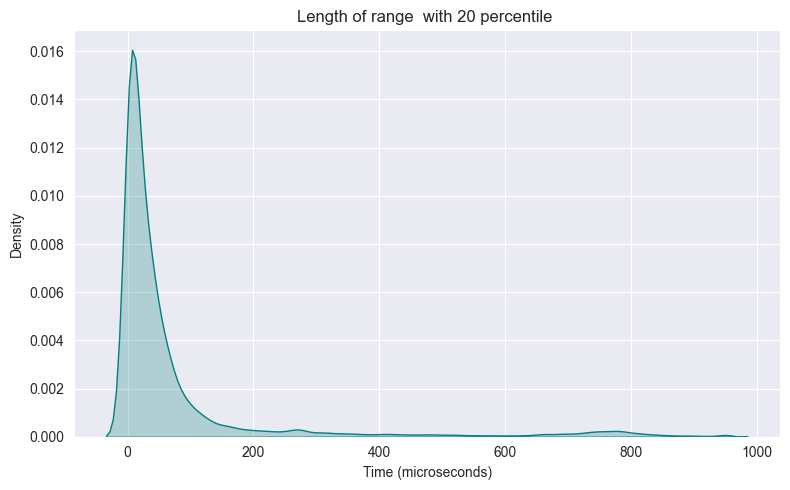

In [167]:
plot_distribution_x(search_range_len, "Length of range",20)

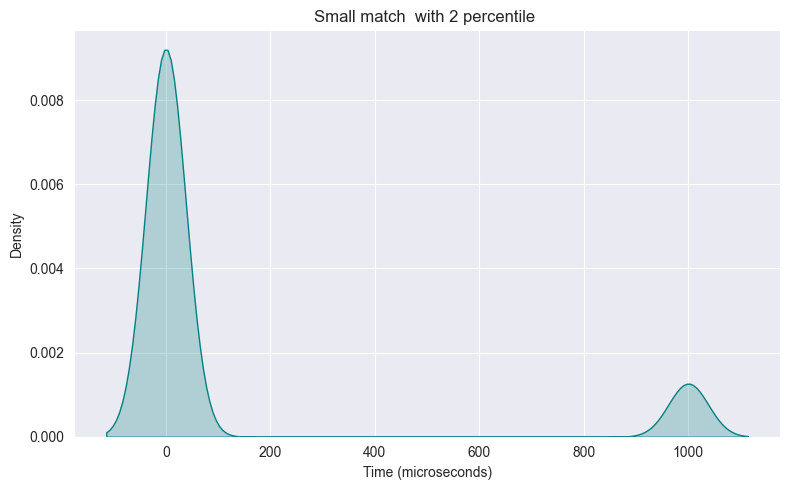

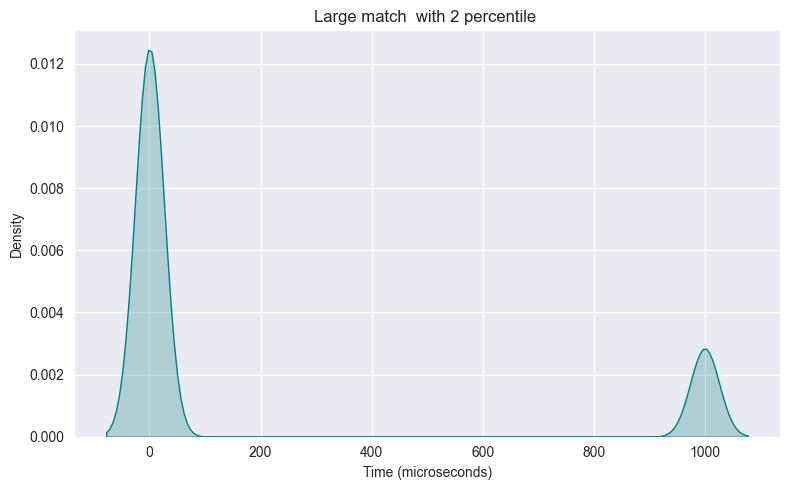

In [159]:
plot_distribution_x(look_up_small, "Small match",2)
plot_distribution_x(look_up_large, "Large match",2)

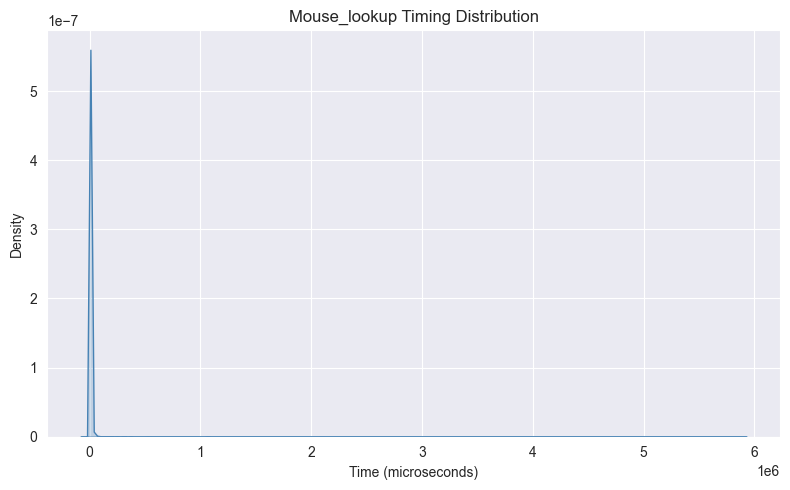

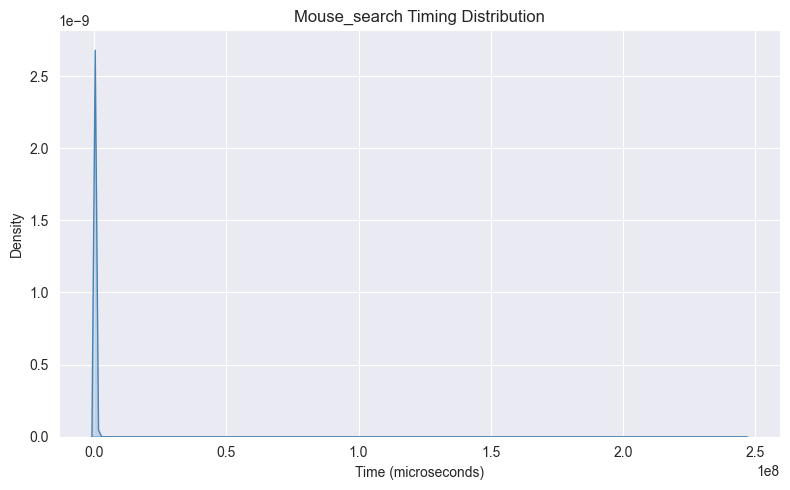

In [136]:
plot_distribution(lookups, "Mouse_lookup")
plot_distribution(search_ranges, "Mouse_search")

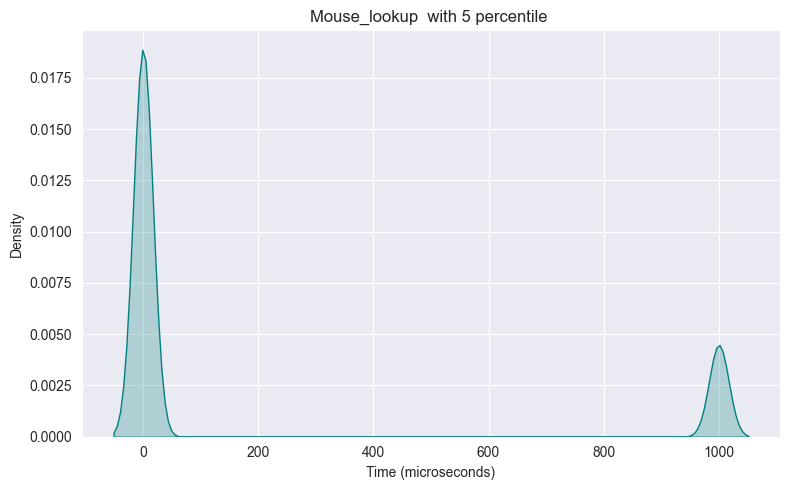

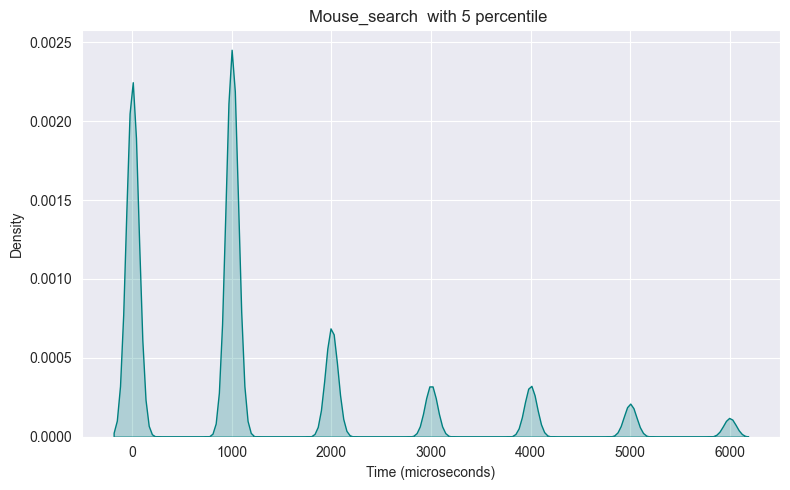

In [137]:
plot_distribution_x(lookups, "Mouse_lookup",5)
plot_distribution_x(search_ranges, "Mouse_search",5)

In [129]:
for t in range(100):
    print(search_ranges[t])

17
13
11
9
8
10
19
5
0
37
27
14
0
0
7
0
0
10
2
7
14
4
6
1
0
6
12
6
9
41
3
3
20
42
39
3
7
9
8
0
0
9
0
0
8
3
0
0
8
2
0
34
11
1
5
6
5
6
3
0
11
0
15
8
3
0
4
0
4
7
3
6
8
9
10
3
4
6
11
0
7
0
0
7
8
1
10
6
8
10
8
21
2
0
7
0
10
3
1
4


In [130]:
c=0
t=0
while t<1000:

    ell=lookups[t]
    if ell>10:
        c+=1

    t+=1
print(c/t,c)

c=0
t=0
while t<1000:
    ell=search_ranges[t]
    if ell>10:
        c+=1

    t+=1
print(c/t,c)

0.0 0
0.105 105


In [83]:
from itertools import tee
log_path = '/Users/chandrasekharmukherjee/Downloads/STAR_test_human/output_125mouse.log'

ranges_full_mouse=[]

with open(log_path, 'r') as f:
    lines1, lines2 = tee(f)
    next(lines2, None)  # advance lines2 by one

    for line1, line2 in zip(lines1, lines2):
         if "Lmax=14" in line1 and "Search-range" in line2:
            value = int(line2.strip().split()[1])
            ranges_full_mouse.append(value)

log_path = '/Users/chandrasekharmukherjee/Downloads/STAR_test_human/output_100human.log'

ranges_full_human=[]

with open(log_path, 'r') as f:
    lines1, lines2 = tee(f)
    next(lines2, None)  # advance lines2 by one

    for line1, line2 in zip(lines1, lines2):
         if "Lmax=14" in line1 and "Search-range" in line2:
            value = int(line2.strip().split()[1])
            ranges_full_human.append(value)

In [87]:
import numpy as np
print(len(ranges_full_mouse),np.min(ranges_full_mouse),np.max(ranges_full_mouse),np.median(ranges_full_mouse),np.mean(ranges_full_mouse))
print(len(ranges_full_human), np.min(ranges_full_human),np.max(ranges_full_human),np.median(ranges_full_human),np.mean(ranges_full_human))

736258 1.0 1.8446744070340045e+19 36.0 3.6404520076871155e+17
6381505 1.0 1.8446744071064904e+19 42.0 3.9843664080968986e+17


In [77]:
import numpy as np
print(len(ranges))
print(np.min(ranges),np.max(ranges), np.mean(ranges),np.std(ranges),np.median(ranges))

# for ell in ranges:
#     if ell>1000:
#         print(ell)

743600
1.0 1.8446744070340045e+19 4.8146101262019405e+17 2.941017403274912e+18 36.0


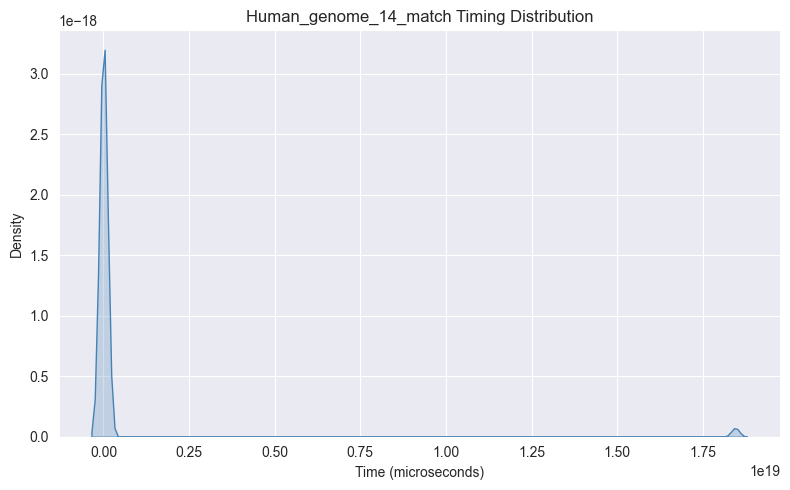

In [89]:
plot_distribution(ranges_full_human, "Human_genome_14_match")

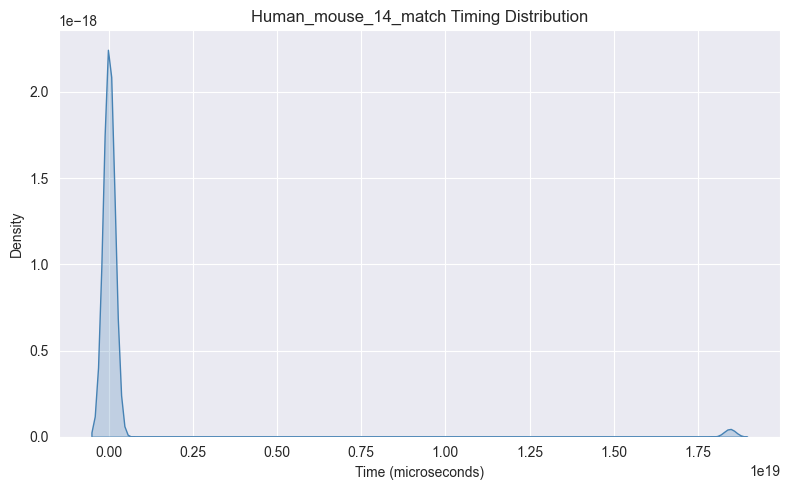

In [90]:
plot_distribution(ranges_full_mouse, "Human_mouse_14_match")

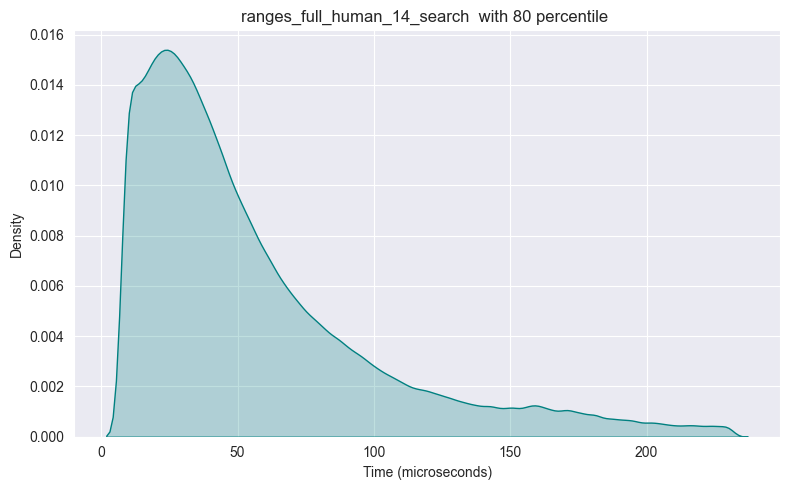

In [105]:
plot_distribution_x(ranges_full_human, "ranges_full_human_14_search",percentile=80)

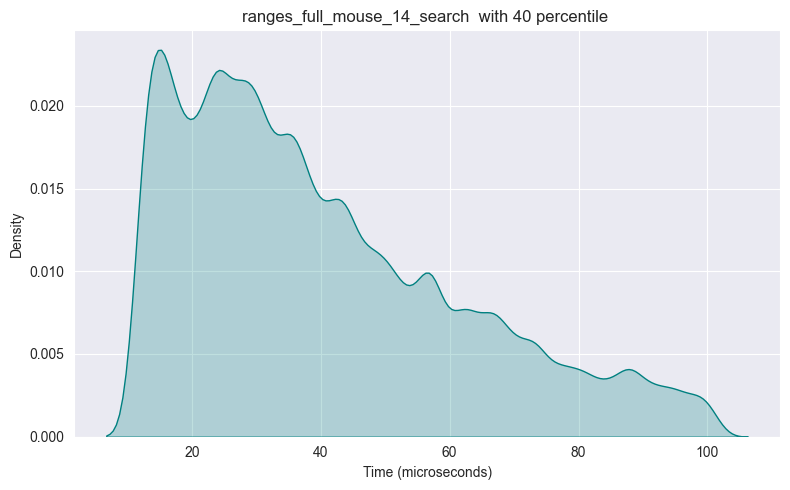

In [102]:
plot_distribution_x(ranges_full_mouse, "ranges_full_mouse_14_search",percentile=40)

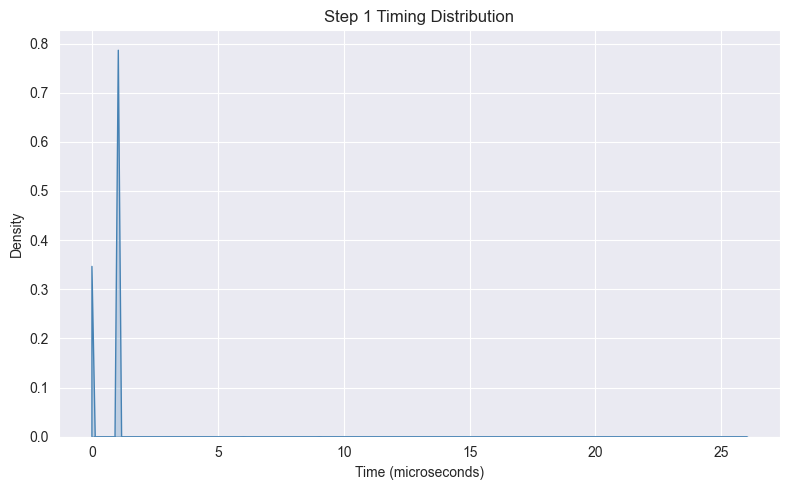

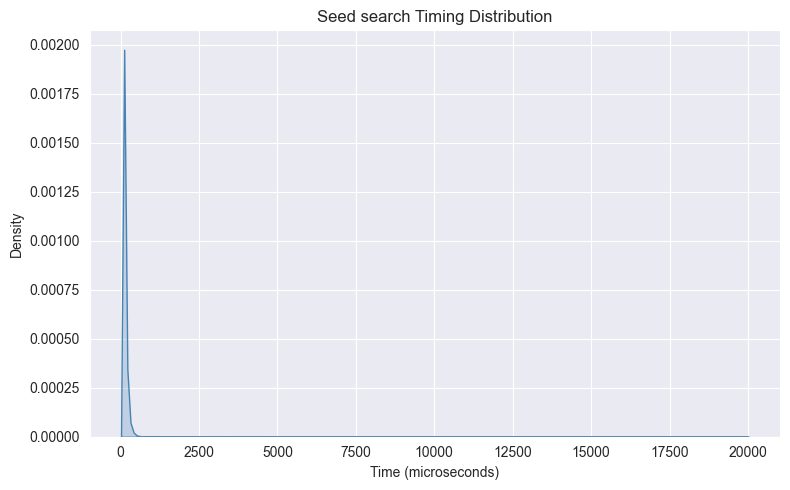

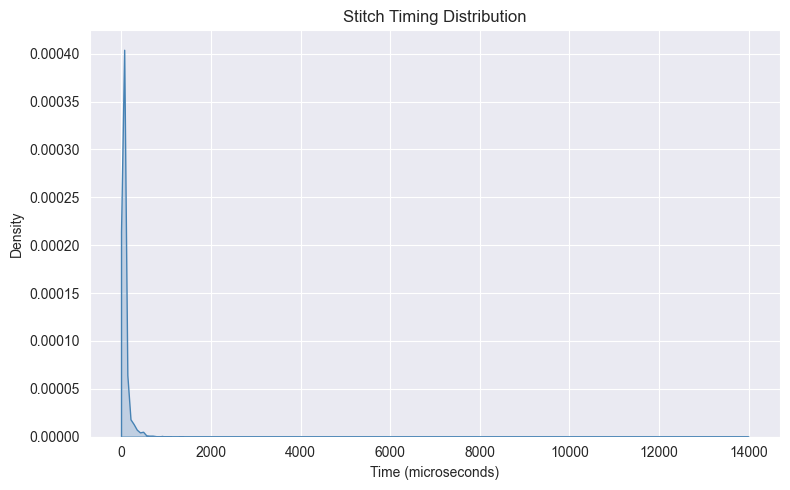

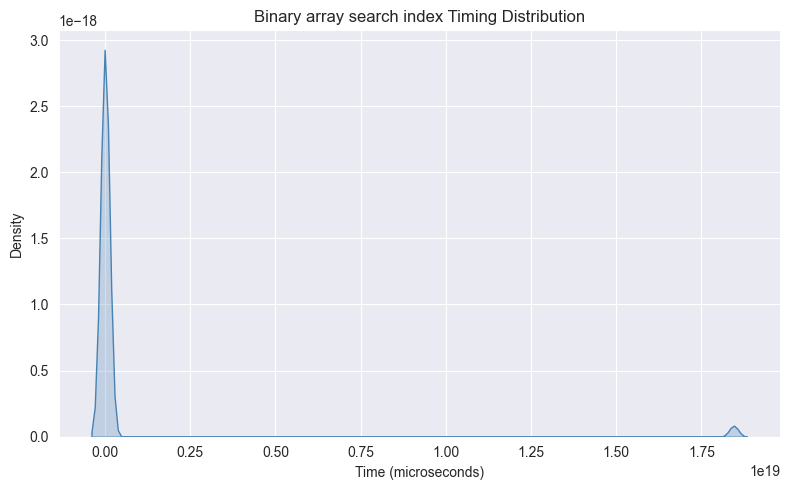

In [54]:


# Plot each step separately
plot_distribution(step1_vals, "Step 1")
plot_distribution(step2_vals, "Seed search")
plot_distribution(step3_vals, "Stitch")
plot_distribution(ranges, "Binary array search index")


In [27]:
a='CNTATATAGGAAAAACTCAAGGGGGGAGAGCGGGGCAGGGAAAGTACAAGTTTACATAACTAAGGGGTTCTGCCAAGGGACAAGGGGTTCTGCCAAGGGATTCTACGTAACTAAGGGGTCATGTC'
print(len(a))

125


/var/folders/_4/7w06955d5hd4jr65m_v6y_vh0000gn/T/ipykernel_75832/758846361.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(trimmed, fill=True, color='teal')


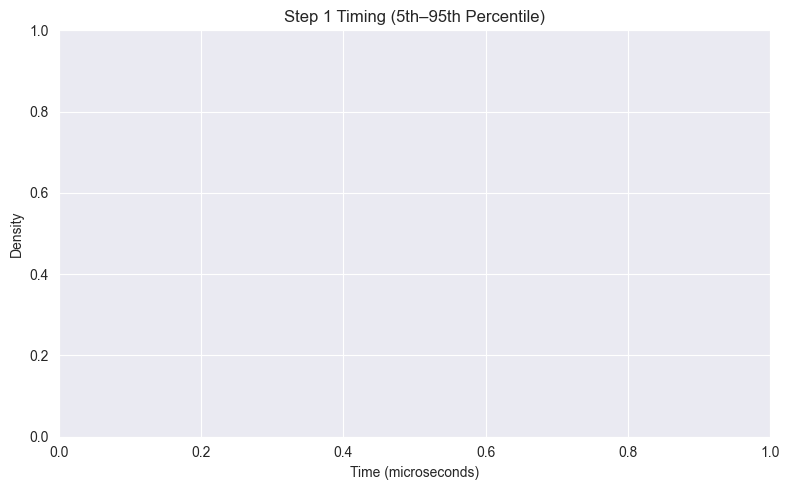

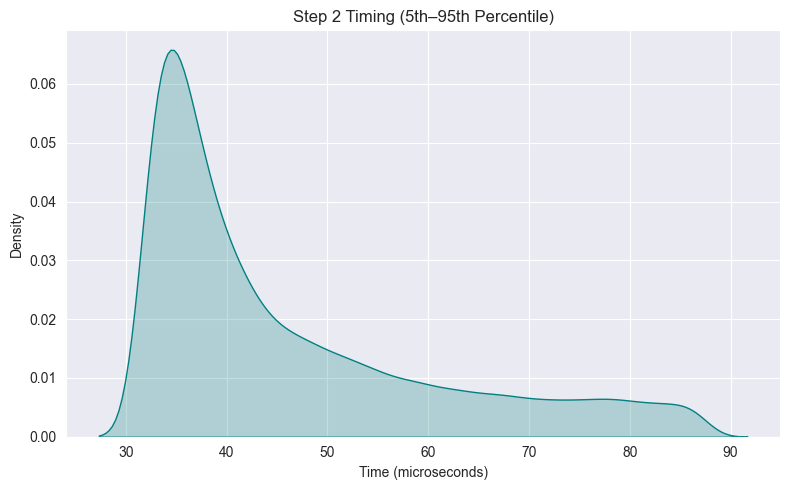

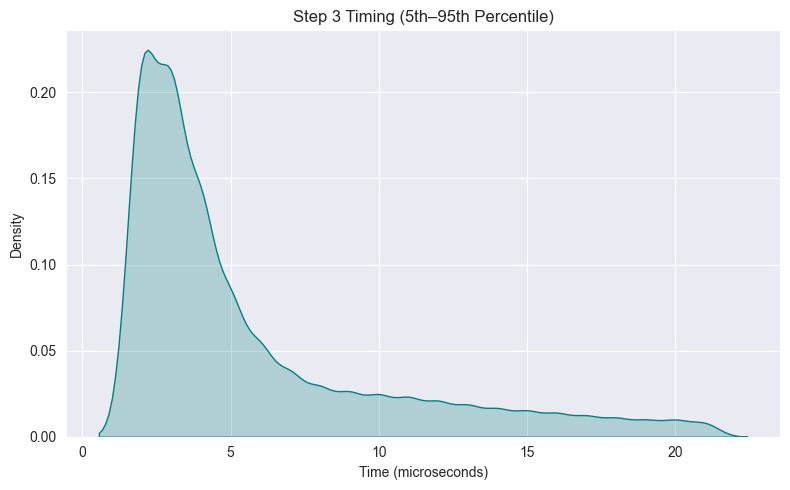

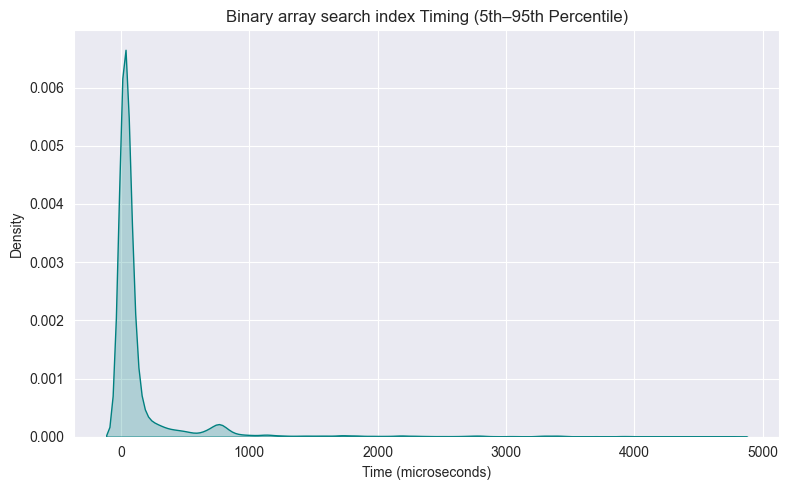

In [82]:

# Plot each step
plot_distribution_x(step1_vals, "Step 1")
plot_distribution_x(step2_vals, "Step 2")
plot_distribution_x(step3_vals, "Step 3")
plot_distribution_x(ranges, "Binary array search index")